# <center>Uber Analysis</center>

# 1.Data Import

In [1]:
### lets import all the necessary packages !

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

In [5]:
os.listdir("C:/Users/Dell/Downloads/UberAnalysis/Datasets")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [6]:
uber_15 = pd.read_csv("C:/Users/Dell/Downloads/UberAnalysis/Datasets/uber-raw-data-janjune-15_sample.csv")

In [8]:
#data shape
uber_15.shape

(100000, 4)

## 2. Data Preprocessing
        check data-type , check missing values , check whether duplicated values or not !
        ie Prepare Data for Analysis !

In [9]:
#check types
type(uber_15)

pandas.core.frame.DataFrame

**a) Handle duplicates**

In [11]:
uber_15.duplicated().sum()

54

In [12]:
uber_15.drop_duplicates(inplace=True)

In [13]:
uber_15.duplicated().sum()

0

**b) Check missing values**

In [14]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [20]:
uber_15['Affiliated_base_num']

0        B02764
1        B02682
2        B02617
3        B02764
4        B00111
          ...  
99995    B02764
99996    B02764
99997    B02598
99998    B02682
99999    B02764
Name: Affiliated_base_num, Length: 99946, dtype: object

**c) Adjust dtypes**

In [21]:
uber_15.shape

(99946, 4)

In [22]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [23]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [24]:
type(uber_15['Pickup_date'][0])

str

In [25]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

In [26]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [27]:
uber_15['Pickup_date'][0]

Timestamp('2015-05-02 21:43:00')

In [28]:
type(uber_15['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [29]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

# 3. Data Exploration

**a) Uber Runs by month**

In [30]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [31]:
uber_15['month'] = uber_15['Pickup_date'].dt.month_name()

In [32]:
uber_15['month']

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: month, Length: 99946, dtype: object

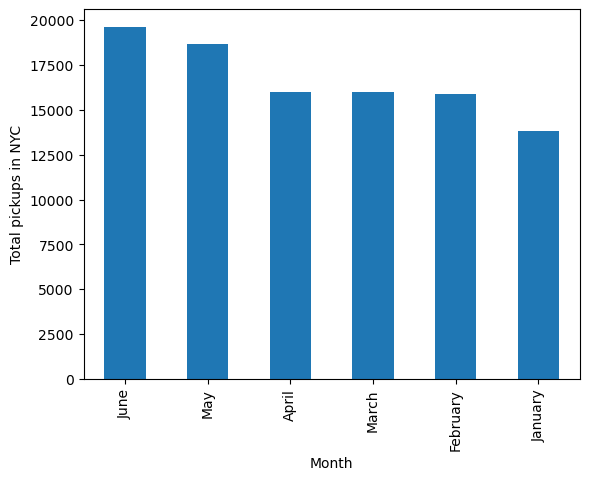

In [41]:
uber_15['month'].value_counts().plot(kind='bar')

plt.xlabel("Month")
plt.ylabel("Total pickups in NYC")

plt.show()

June has the max pickup while January has the minimum.

**b) Total pickups by weekday per month**

In [36]:
## extracting dervied features (weekday ,day ,hour ,month ,minute) from 'Pickup_date'..

uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [42]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,23,7,3


In [43]:
## pivot table

pivot = pd.crosstab(index=uber_15['month'] , columns=uber_15['weekday'])

In [44]:
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<AxesSubplot:xlabel='month'>

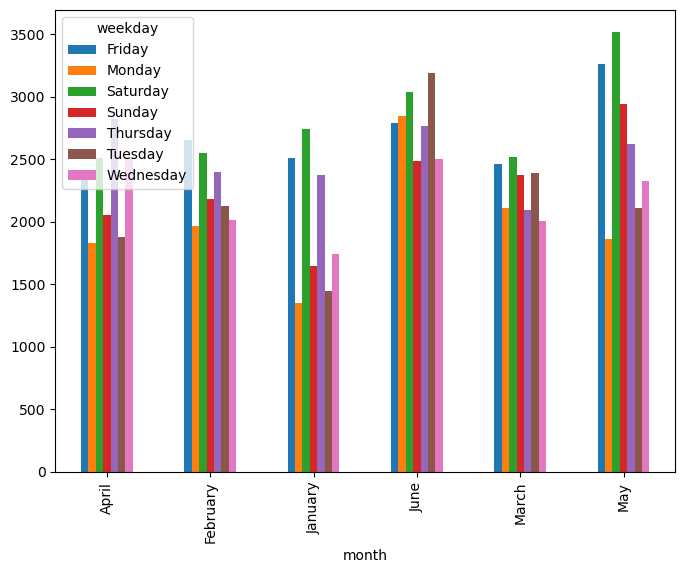

In [45]:
## grouped-bar plot using Pandas ..
pivot.plot(kind='bar' , figsize=(8,6))

On Saturday & Friday, u are getting more Uber pickups in each month , it seems that New Yorkers used to go for 
shopping , Malls , fun activities alot on these days

# 4. Rush hours on NYC

In [46]:
summary = uber_15.groupby(['weekday' , 'hour'] , as_index=False).size()

In [47]:
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<AxesSubplot:xlabel='hour', ylabel='size'>

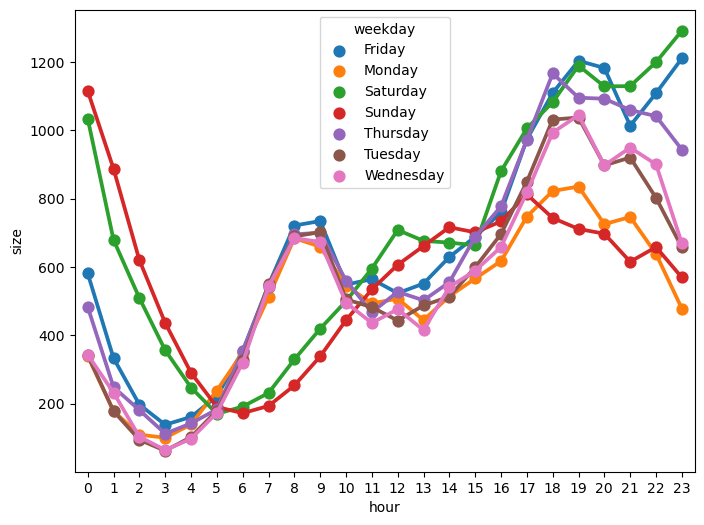

In [48]:
## pointplot between 'hour' & 'size' for all the weekdays..

plt.figure(figsize=(8,6))
sns.pointplot(x="hour" , y="size" , hue="weekday" , data=summary)

It's interesting to see that Saturday and Sunday exhibit similar demand throughout the late night/morning/afternoon, 
but it exhibits opposite trends during the evening. In the evening, Saturday pickups continue to increase throughout the evening,
but Sunday pickups takes a downward turn after evening..

We can see that there the weekdays that has the most demand during the late evening is Friday and Saturday, 
which is expected, but what strikes me is that Thursday nights also exhibits very similar trends as Friday and Saturday nights.

It seems like New Yorkers are starting their 'weekends' on Thursday nights. :)

# 5. Active vehicles by base_num

In [49]:
uber_15.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'month', 'weekday', 'day', 'hour', 'minute'],
      dtype='object')

In [54]:
uber_foil = pd.read_csv("C:/Users/Dell/Downloads/UberAnalysis/Datasets/Uber-Jan-Feb-FOIL.csv")
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [53]:
uber_foil.shape

(354, 4)

In [55]:
!pip install chart_studio

     ---------------------------------------- 64.4/64.4 kB 3.4 MB/s eta 0:00:00


In [56]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot 

In [57]:
init_notebook_mode(connected=True)

In [58]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [59]:
px.box(x='dispatching_base_number' , y='active_vehicles' , data_frame=uber_foil)

In [60]:
px.violin(x='dispatching_base_number' , y='active_vehicles' , data_frame=uber_foil)

# 6.. Concat all datasets

In [86]:
files = os.listdir("C:/Users/Dell/Downloads/UberAnalysis/Datasets")
files = files[-8:]
files.remove('uber-raw-data-janjune-15_sample.csv')
files.remove("uber-raw-data-janjune-15.csv")
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [148]:
#blank dataframe
final = pd.DataFrame()

path = "C:/Users/Dell/Downloads/UberAnalysis/Datasets"

for file in files :
    print(path+'/'+file)
    current_df = pd.read_csv(path+'/'+file)
    final = pd.concat([current_df , final])
    
final.head()

C:/Users/Dell/Downloads/UberAnalysis/Datasets/uber-raw-data-apr14.csv
C:/Users/Dell/Downloads/UberAnalysis/Datasets/uber-raw-data-aug14.csv
C:/Users/Dell/Downloads/UberAnalysis/Datasets/uber-raw-data-jul14.csv
C:/Users/Dell/Downloads/UberAnalysis/Datasets/uber-raw-data-jun14.csv
C:/Users/Dell/Downloads/UberAnalysis/Datasets/uber-raw-data-may14.csv
C:/Users/Dell/Downloads/UberAnalysis/Datasets/uber-raw-data-sep14.csv


,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [149]:
final.shape

(4534327, 4)

In [150]:
### checkduplicate
final.duplicated().sum()

82581

In [151]:
## drop duplicate rows
final.drop_duplicates(inplace=True)

In [152]:
final.shape

(4451746, 4)

In [153]:
final.duplicated().sum()

0

In [95]:
final.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


## Dataset Information : 

### The dataset contains information about the Datetime, Latitude, Longitude and Base of each uber ride that happened in the month of July 2014 at New York City, USA

##### Date/Time : The date and time of the Uber pickup

##### Lat : The latitude of the Uber pickup

##### Lon : The longitude of the Uber pickup

##### Base : The TLC base company code affiliated with the Uber pickup

    The Base codes are for the following Uber bases:
    B02512 : Unter
    B02598 : Hinter
    B02617 : Weiter
    B02682 : Schmecken
    B02764 : Danach-NY


# 7. What locations of New York City we are getting rush ??

In [147]:
rush_uber = final.groupby(['Lat' , 'Lon'] , as_index=False).size()

In [125]:
rush_uber.head(6)

,Lat,Lon,size
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.7214,-74.2446,1
3,39.8416,-74.1512,1
4,39.9055,-74.0791,1
5,39.9196,-74.1112,1


In [126]:
rush_uber.dtypes

Lat     float64
Lon     float64
size      int64
dtype: object

In [127]:
rush_uber["size"] = rush_uber["size"].astype("int")

In [128]:
rush_uber.dtypes

Lat     float64
Lon     float64
size      int32
dtype: object

In [131]:
import folium
from folium.plugins import HeatMap

In [132]:
basemap = folium.Map()

HeatMap(rush_uber).add_to(basemap)

  We can see a number of hot spots here. Midtown Manhattan is clearly a huge bright spot
    & these are made from Midtown to Lower Manhattan followed by Upper Manhattan and the Heights of Brooklyn.

#  Examine rush on Hour and Weekday ( Perform Pair wise Analysis )

In [154]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [155]:
final.head(3)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512


In [156]:
final.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [157]:
final['Date/Time'][0]

0    9/1/2014 0:01:00
0    5/1/2014 0:02:00
0    6/1/2014 0:00:00
0    7/1/2014 0:03:00
0    8/1/2014 0:03:00
0    4/1/2014 0:11:00
Name: Date/Time, dtype: object

In [158]:
### converting 'Date/Time' feature into date-time..

final['Date/Time'] = pd.to_datetime(final['Date/Time'] , format="%m/%d/%Y %H:%M:%S")

In [159]:
final['Date/Time'].dtype

dtype('<M8[ns]')

In [160]:
### extracting 'weekday' & 'hour' from 'Date/Time' feature..

final['day'] = final['Date/Time'].dt.day
final['hour'] = final['Date/Time'].dt.hour

In [161]:
final.head(4)

,Date/Time,Lat,Lon,Base,day,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0


In [162]:
pivot = final.groupby(['day' , 'hour']).size().unstack()

In [163]:
pivot


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,...,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,...,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,...,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,...,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,...,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,...,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,...,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,...,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,...,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [164]:
### styling dataframe
pivot.style.background_gradient()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203
